# Week 1

## Overview
As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2024/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science (not necesarily a good one, see notes on "dark sides" below). 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. 

[![A link to the video](http://img.youtube.com/vi/YxvyeaL7NEM/0.jpg)](http://www.youtube.com/watch?v=YxvyeaL7NEM "The video")

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2024? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article. 

# Part 2: Load some crime-data into your Jupyter notebook

The data we will be working with is perfect for `pandas`, so a good approach is to go to [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2024/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't and figure out how to load data into `pandas' means. 

But this course is not about programming orthdoxy, so if you don't like `pandas`, you're free to use other solutions. There are many other ways to load data into Python, e.g. using dictionaries.

> *Exercise 1*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. **Today, to keep things easy, we will just work with the data from 2003 to 2018** (from January 1st 2003 to December 31st 2017 to be exact). 
> * Thus, you may simply download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * To get this thing into `pandas`, you can use the tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/). If you want to try your luck without `pandas`, you can use the `csv` package to load the file.
> * Now generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

---

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2*: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences. This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). Mine looks like this (but yours doesn't have to look exactly like mine - the important thing is that you clearly communicate the information in the dataset).

<div>
<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
</div>

In [46]:
#PRELIMINARY
import pandas
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#get current working directory
cwd = os.getcwd()
#get parent directory
parent = os.path.dirname(cwd)
#get files directory
files = os.path.join(parent, 'files')
#get police department data as pandas dataframe
police = pandas.read_csv(os.path.join(files, 'Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv'))


In [58]:
#CLEAN DATA (Remove all data from 2018)
#convert string to datetime
police['Date'] = pandas.to_datetime(police['Date'])
#get year from datetime and store into new column called year
police['Year'] = police['Date'].dt.year
#remove all rows with year 2018
police = police[police.Year != 2018]

In [59]:
#Total number of crimes
print("Total number of crimes: " + str(len(police)))

Total number of crimes: 2084466


In [60]:
#Find all unique instances of crime category
print("Unique Crime Categories, and number of crimes in each \n")
for category in police['Category'].unique():
    print(category + ": " + str(len(police[police['Category'] == category])))

Unique Crime Categories, and number of crimes in each 

ROBBERY: 53417
VEHICLE THEFT: 124759
ARSON: 3778
ASSAULT: 163158
TRESPASS: 18681
BURGLARY: 88971
LARCENY/THEFT: 464365
WARRANTS: 98234
OTHER OFFENSES: 296411
DRUG/NARCOTIC: 116352
SUSPICIOUS OCC: 77392
LIQUOR LAWS: 2826
VANDALISM: 111933
WEAPON LAWS: 20397
NON-CRIMINAL: 231689
MISSING PERSON: 43297
FRAUD: 40540
SEX OFFENSES, FORCIBLE: 8471
SECONDARY CODES: 21905
DISORDERLY CONDUCT: 9838
RECOVERED VEHICLE: 8688
KIDNAPPING: 4228
FORGERY/COUNTERFEITING: 22800
PROSTITUTION: 16453
DRUNKENNESS: 9676
BAD CHECKS: 915
DRIVING UNDER THE INFLUENCE: 5560
LOITERING: 2386
STOLEN PROPERTY: 11193
SUICIDE: 1273
BRIBERY: 779
EXTORTION: 717
EMBEZZLEMENT: 2939
GAMBLING: 334
PORNOGRAPHY/OBSCENE MAT: 54
SEX OFFENSES, NON FORCIBLE: 43
TREA: 14


<Axes: title={'center': 'Number of Crimes by Category'}, xlabel='Category'>

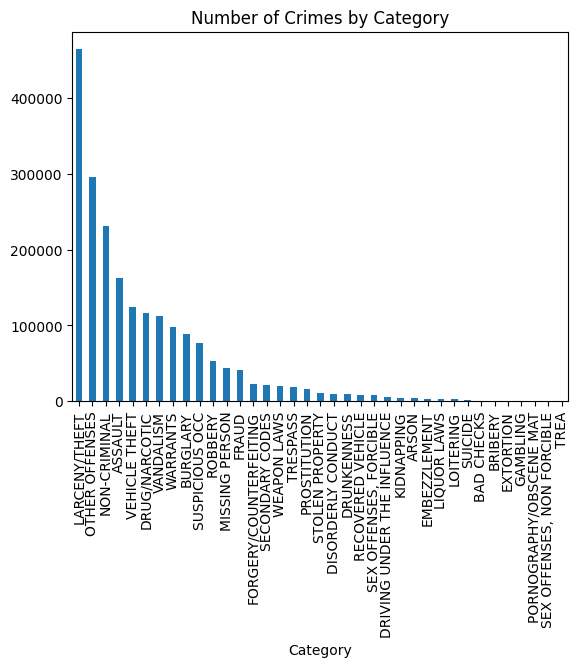

In [73]:
#Create a histogram for all categories of crime
police['Category'].value_counts().plot(kind='bar', title='Number of Crimes by Category')

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with the fewest crimes? (**hint** if your result is 2018, go back and see what I wrote about the date range up in exercise 1).
> * Create a barplot of crimes-per-year (years on the $x$-axis, crime-counts on the $y$-axis).
> * Finally, Police chief Suneman is interested in the temporal development of only a **subset of categories, the so-called *focus crimes***. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

In [74]:
crimes_per_year = np.zeros(len(police['Year'].unique()), dtype=int)
for i,year in enumerate(np.sort(police['Year'].unique())):
    crimes_per_year[i] = len(police[police['Year'] == year])
    print("Number of crimes in " + str(year) + ": " + str(crimes_per_year[i]))

#Year with most crimes
print("Year with most crimes: " + str(crimes_per_year.argmax() + 2003))
print("Year with least crimes: " + str(crimes_per_year.argmin() + 2003))

Number of crimes in 2003: 142803
Number of crimes in 2004: 142054
Number of crimes in 2005: 137048
Number of crimes in 2006: 131856
Number of crimes in 2007: 131771
Number of crimes in 2008: 135242
Number of crimes in 2009: 134309
Number of crimes in 2010: 127758
Number of crimes in 2011: 126713
Number of crimes in 2012: 135464
Number of crimes in 2013: 147664
Number of crimes in 2014: 144844
Number of crimes in 2015: 151459
Number of crimes in 2016: 145994
Number of crimes in 2017: 149487
Year with most crimes: 2015
Year with least crimes: 2011


<Axes: title={'center': 'Crimes per Year'}, xlabel='Year'>

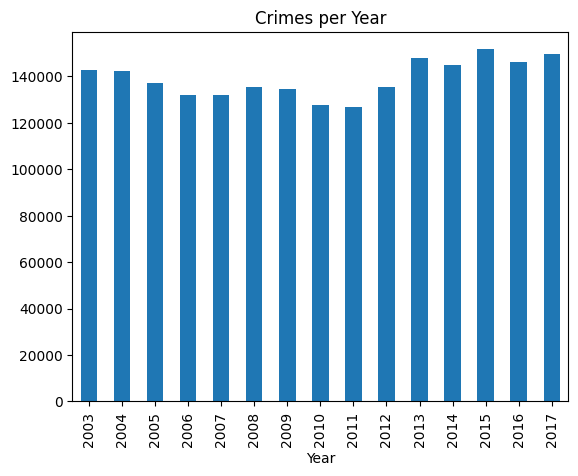

In [75]:
#creates a histogram of crimes per year (sorted by year)
police['Year'].value_counts().sort_index().plot(kind='bar', title='Crimes per Year')

Text(0.5, 1.0, 'Crimes per Year for Focus Crimes')

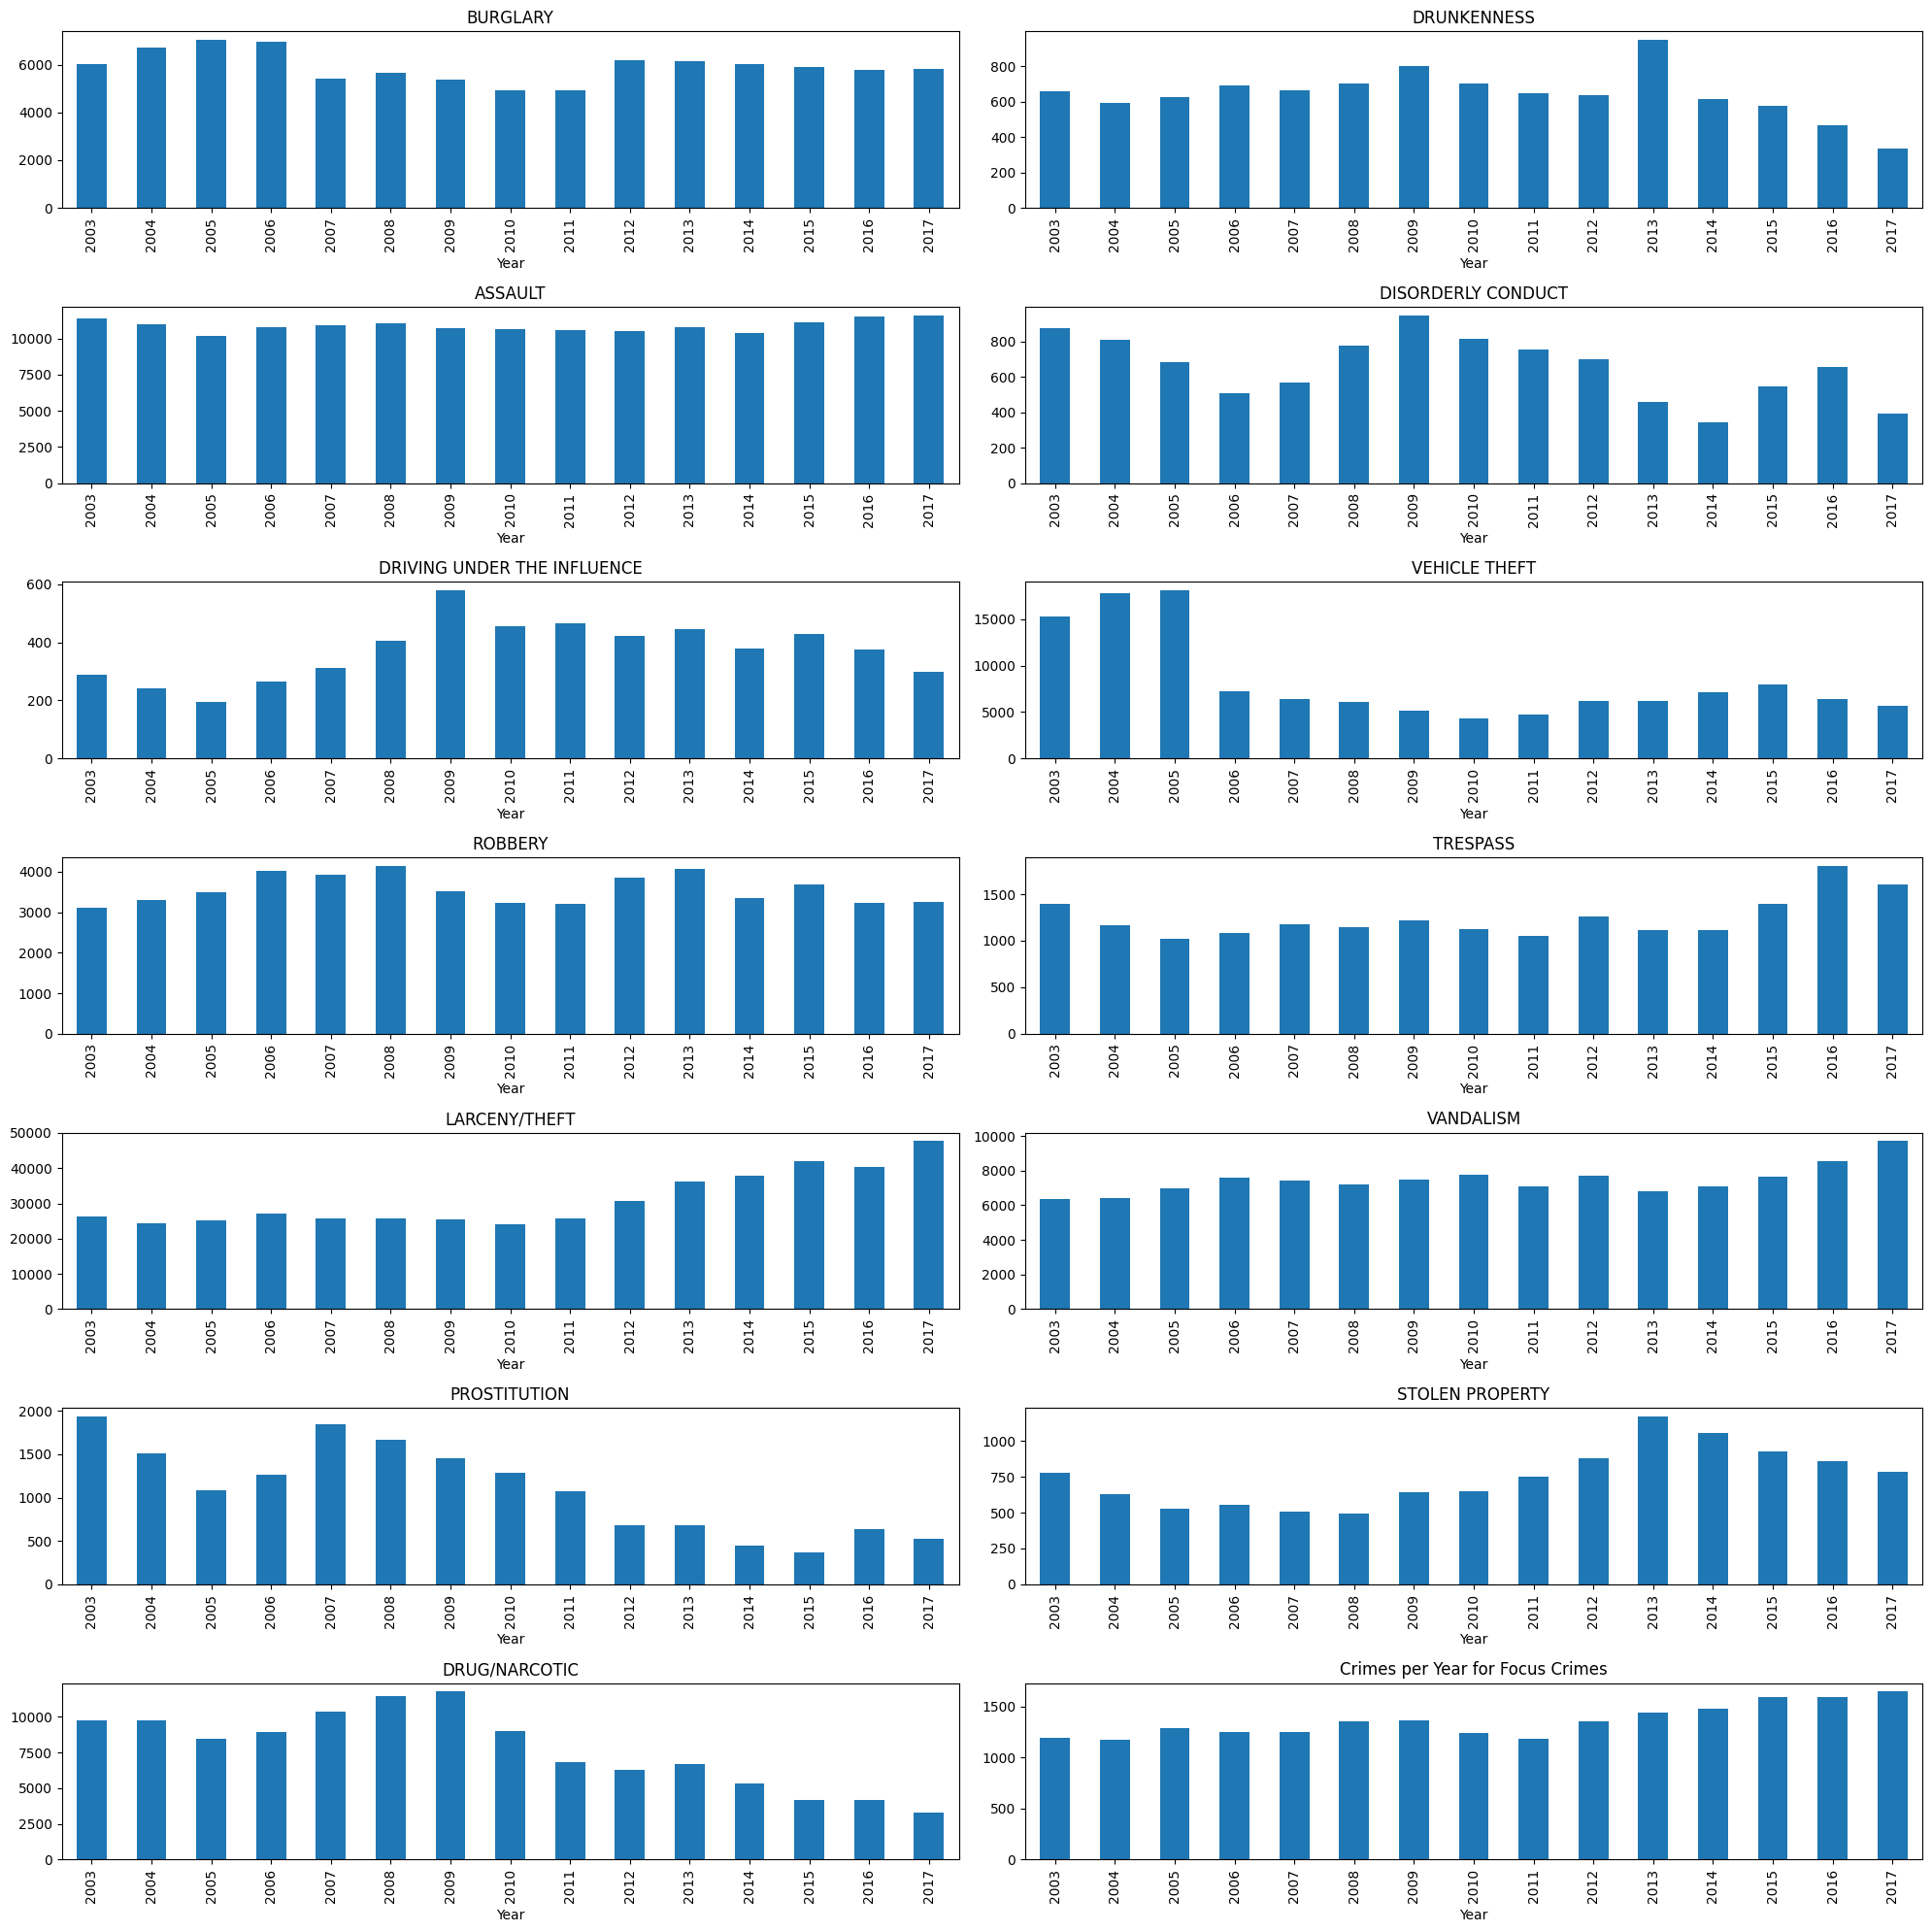

In [76]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
#create subplots for each crime subcategory in focuscrimes
fig, axes = plt.subplots(nrows=len(focuscrimes)//2, ncols=2)
for i,crime in enumerate(focuscrimes):
    police[police['Category'] == crime]['Year'].value_counts().sort_index().plot(kind='bar', ax=axes[i//2,i%2], title=crime, figsize=(20,20))
plt.tight_layout()
plt.title('Crimes per Year for Focus Crimes')


My plot looks like this for the 14 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimesYearCategory.png)
    
Note that names of each plot explain what you're looking at. And that when you have many subplots it's OK that you don't label every single axis. You may simply put axes on the bottom / side that are common for all plots.) 

**What I want you to notice is that by "drilling into" the data, exploring by category patterns begin to emerge**. The overall crime-counts don't tell us much, but as we interrogate the data, we start to learn about what's going on. We will continue this exploration next week.

> *Exercise 3 (continued)*
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default pandas plots is quite boring (that blue... and font... 😂). 

This is a placeholder for the answer to the question about the dark sides of predictive policing.